In [ ]:
from google.colab import files

images = files.upload()

Saving DatasetZip.zip to DatasetZip.zip


In [ ]:
! ls -l

total 190800
-rw-r--r-- 1 root root 195369966 Apr 14 01:33 DatasetZip.zip
drwxr-xr-x 1 root root      4096 Apr  8 13:32 sample_data


In [ ]:
! unzip DatasetZip.zip

In [ ]:
! ls -l /content/DatasetZip/training

total 36
drwxr-xr-x 2 root root 12288 Mar  9 21:39 incorrectlyheld
drwxr-xr-x 2 root root 12288 Mar  9 21:41 withmask
drwxr-xr-x 2 root root 12288 Mar  9 21:42 withoutmask


In [ ]:
! ls -l /content/DatasetZip/testing

total 12
drwxr-xr-x 2 root root 4096 Mar  9 21:39 incorrectlyheld
drwxr-xr-x 2 root root 4096 Mar  9 21:41 withmask
drwxr-xr-x 2 root root 4096 Mar  9 21:42 withoutmask


In [ ]:
! ls -l /content/DatasetZip/validation

total 12
drwxr-xr-x 2 root root 4096 Mar  8 20:14 incorrectlyheld
drwxr-xr-x 2 root root 4096 Mar  8 20:11 withmask
drwxr-xr-x 2 root root 4096 Mar  8 19:40 withoutmask


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
my_augmented_generator = ImageDataGenerator(rotation_range=25,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.4,
    zoom_range=0.1,
    horizontal_flip=False,
    rescale=1./255, fill_mode='nearest')

In [ ]:
training_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/training', target_size=(256,256), batch_size=32, class_mode='categorical')
valid_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/validation', target_size=(256,256), batch_size=32, class_mode='categorical')
test_image_generator = my_augmented_generator.flow_from_directory( '/content/DatasetZip/testing', target_size=(256,256), batch_size=141, class_mode='categorical')

Found 530 images belonging to 3 classes.
Found 122 images belonging to 3 classes.
Found 141 images belonging to 3 classes.


In [ ]:

for my_batch in training_image_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    break


In [ ]:

for my_batch in test_image_generator:
    # my_batch is a tuple with images and labels
    imagesT = my_batch[0]
    labelsT = my_batch[1]
    break


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras import regularizers

### **Reducing Network's size**

In [ ]:
model1 = 0

In [ ]:
 
model1 = Sequential()
model1.add( Conv2D( 42, ( 3,3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model1.add( MaxPool2D(3,3,) )
model1.add( Conv2D( 28, ( 3,3), activation = 'relu' ) )
model1.add( MaxPool2D(3,3,) )
model1.add( Flatten() )
model1.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 42)      1176      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 42)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 28)        10612     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20412)             0         
                                                                 
 dense (Dense)               (None, 3)                 6

In [ ]:
model1.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model1.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=22, verbose=1)
history = model1.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.1601 - accuracy: 0.2906
Epoch 1: val_accuracy improved from -inf to 0.28689, saving model to model1.hdf5
17/17 [==============================] - 53s 3s/step - loss: 1.1601 - accuracy: 0.2906 - val_loss: 1.1550 - val_accuracy: 0.2869
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.1506 - accuracy: 0.2981
Epoch 2: val_accuracy improved from 0.28689 to 0.30328, saving model to model1.hdf5
17/17 [==============================] - 51s 3s/step - loss: 1.1506 - accuracy: 0.2981 - val_loss: 1.1387 - val_accuracy: 0.3033
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.1475 - accuracy: 0.2811
Epoch 3: val_accuracy did not improve from 0.30328
17/17 [==============================] - 51s 3s/step - loss: 1.1475 - accuracy: 0.2811 - val_loss: 1.1393 - val_accuracy: 0.2705
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.1383 - accuracy: 0.2906
Epoch 4: val_accuracy

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

NameError: ignored

### **Adding Dropout Layers**

In [ ]:
model2 = 0

In [ ]:
 
model2 = Sequential()
model2.add( Conv2D( 42, ( 3,3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model2.add(Dropout(rate = 0.25))
model2.add( MaxPool2D(3,3,) )
model2.add( Conv2D( 28, ( 3,3), activation = 'relu' ) )
model2.add(Dropout(rate = 0.25))
model2.add( Flatten() )
model2.add( Dense( 32, activation = 'relu' ) )
model2.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 254, 254, 42)      1176      
                                                                 
 dropout_24 (Dropout)        (None, 254, 254, 42)      0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 84, 84, 42)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 82, 82, 28)        10612     
                                                                 
 dropout_25 (Dropout)        (None, 82, 82, 28)        0         
                                                                 
 flatten_13 (Flatten)        (None, 188272)            0         
                                                     

In [ ]:
model2.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model2.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history1 = model2.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.1009 - accuracy: 0.3528
Epoch 1: val_accuracy improved from -inf to 0.41803, saving model to model2.hdf5
17/17 [==============================] - 74s 4s/step - loss: 1.1009 - accuracy: 0.3528 - val_loss: 1.0790 - val_accuracy: 0.4180
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.0836 - accuracy: 0.4019
Epoch 2: val_accuracy did not improve from 0.41803
17/17 [==============================] - 69s 4s/step - loss: 1.0836 - accuracy: 0.4019 - val_loss: 1.0832 - val_accuracy: 0.4098
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0935 - accuracy: 0.4094
Epoch 3: val_accuracy did not improve from 0.41803
17/17 [==============================] - 68s 4s/step - loss: 1.0935 - accuracy: 0.4094 - val_loss: 1.0824 - val_accuracy: 0.4098
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.0959 - accuracy: 0.4019
Epoch 4: val_accuracy improved from 0.41803 to 0.42623

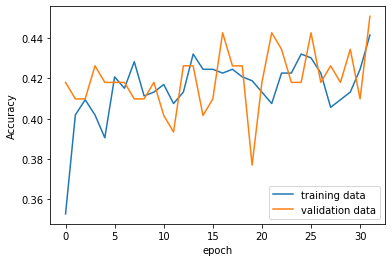

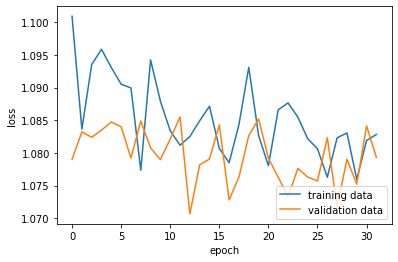

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model3 = 0

In [ ]:
 
model3 = Sequential()
model3.add( Conv2D( 42, ( 3,3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model3.add(Dropout(rate = 0.5))
model3.add( MaxPool2D(3,3,) )
model3.add( Conv2D( 28, ( 3,3), activation = 'relu' ) )
model3.add(Dropout(rate = 0.5))
model3.add( Flatten() )
model3.add( Dense( 32, activation = 'relu' ) )
model3.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 42)      1176      
                                                                 
 dropout_22 (Dropout)        (None, 254, 254, 42)      0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 84, 84, 42)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 82, 82, 28)        10612     
                                                                 
 dropout_23 (Dropout)        (None, 82, 82, 28)        0         
                                                                 
 flatten_12 (Flatten)        (None, 188272)            0         
                                                     

In [ ]:
model3.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model3.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history2 = model3.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.1221 - accuracy: 0.3377
Epoch 1: val_accuracy improved from -inf to 0.43443, saving model to model3.hdf5
17/17 [==============================] - 68s 4s/step - loss: 1.1221 - accuracy: 0.3377 - val_loss: 1.0853 - val_accuracy: 0.4344
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.1120 - accuracy: 0.3736
Epoch 2: val_accuracy did not improve from 0.43443
17/17 [==============================] - 66s 4s/step - loss: 1.1120 - accuracy: 0.3736 - val_loss: 1.0868 - val_accuracy: 0.4344
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.1104 - accuracy: 0.3906
Epoch 3: val_accuracy did not improve from 0.43443
17/17 [==============================] - 66s 4s/step - loss: 1.1104 - accuracy: 0.3906 - val_loss: 1.0914 - val_accuracy: 0.3770
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.1130 - accuracy: 0.3906
Epoch 4: val_accuracy did not improve from 0.43443
17/

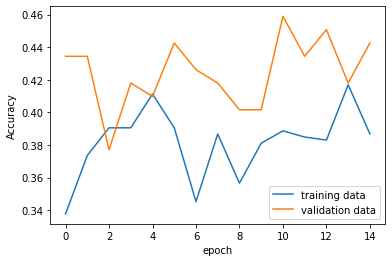

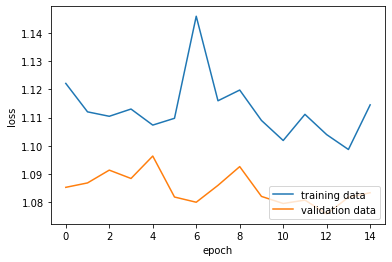

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

### **Batch Normalization**

In [ ]:
model4 = 0

In [ ]:

model4 = Sequential()
model4.add( Conv2D( 42, ( 3,3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model4.add(BatchNormalization())
model4.add( MaxPool2D(3,3,) )
model4.add( Conv2D( 28, ( 3,3), activation = 'relu' ) )
model4.add(BatchNormalization())
model4.add( Flatten() )
model4.add( Dense( 32, activation = 'relu' ) )
model4.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model4.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model4.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history3 = model4.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.4376 - accuracy: 0.3415
Epoch 1: val_accuracy improved from -inf to 0.48361, saving model to model4.hdf5
17/17 [==============================] - 68s 4s/step - loss: 1.4376 - accuracy: 0.3415 - val_loss: 1.0881 - val_accuracy: 0.4836
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.2573 - accuracy: 0.4038
Epoch 2: val_accuracy did not improve from 0.48361
17/17 [==============================] - 67s 4s/step - loss: 1.2573 - accuracy: 0.4038 - val_loss: 1.1037 - val_accuracy: 0.3197
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.2267 - accuracy: 0.4132
Epoch 3: val_accuracy did not improve from 0.48361
17/17 [==============================] - 67s 4s/step - loss: 1.2267 - accuracy: 0.4132 - val_loss: 1.1026 - val_accuracy: 0.3197
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.1173 - accuracy: 0.4528
Epoch 4: val_accuracy did not improve from 0.48361
17/

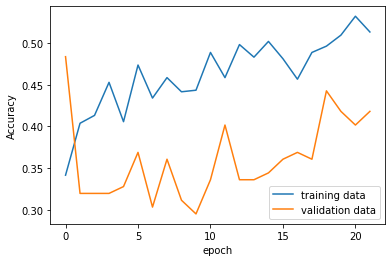

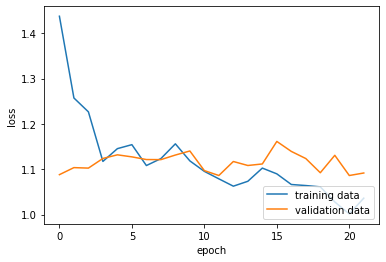

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

**Using Dropuout with Batch Normalization **

In [ ]:
model5 = 0

In [ ]:

model5 = Sequential()
model5.add( Conv2D( 42, ( 3,3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model5.add(BatchNormalization())
model5.add( MaxPool2D(3,3,) )
model5.add( Conv2D( 28, ( 3,3), activation = 'relu' ) )
model5.add(Dropout(rate = 0.5))
model5.add( Flatten() )
model5.add( Dense( 32, activation = 'relu' ) )
model5.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model5.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model5.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history4 = model5.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.1638 - accuracy: 0.4057
Epoch 1: val_accuracy improved from -inf to 0.35246, saving model to model5.hdf5
17/17 [==============================] - 67s 4s/step - loss: 1.1638 - accuracy: 0.4057 - val_loss: 1.1077 - val_accuracy: 0.3525
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.1190 - accuracy: 0.4094
Epoch 2: val_accuracy improved from 0.35246 to 0.41803, saving model to model5.hdf5
17/17 [==============================] - 65s 4s/step - loss: 1.1190 - accuracy: 0.4094 - val_loss: 1.0887 - val_accuracy: 0.4180
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.0999 - accuracy: 0.3943
Epoch 3: val_accuracy improved from 0.41803 to 0.42623, saving model to model5.hdf5
17/17 [==============================] - 65s 4s/step - loss: 1.0999 - accuracy: 0.3943 - val_loss: 1.0908 - val_accuracy: 0.4262
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.0732 - accur

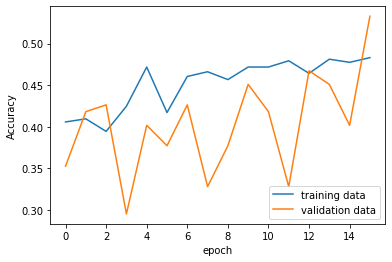

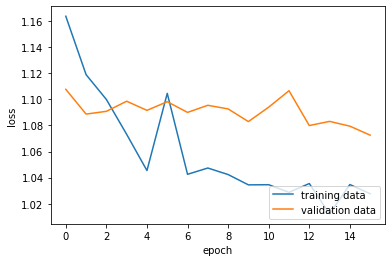

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

## **L1 and L2 Regularization**

In [ ]:
model6 = 0

In [ ]:

model6 = Sequential()
model6.add( Conv2D( 42, ( 7,7 ), activation = 'relu', input_shape =(150,150,3) ) )
model6.add( MaxPool2D(3,3,) )
model6.add( Conv2D( 28, ( 7,7), activation = 'relu', kernel_regularizer = regularizers.l1(0.001) ) )
model6.add( Flatten() )
model6.add( Dense( 32, activation = 'relu', kernel_regularizer = regularizers.l1(0.001) ))
model6.add( Dense( 3, activation = 'softmax' ))

In [ ]:
model6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 144, 144, 42)      6216      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 42)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 42, 28)        57652     
                                                                 
 flatten_2 (Flatten)         (None, 49392)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                1580576   
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                      

In [ ]:
256,128,64,32
model6.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model6.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history5 = model6.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 18.5833 - accuracy: 0.3679
Epoch 1: val_accuracy improved from -inf to 0.40164, saving model to model6.hdf5
17/17 [==============================] - 114s 7s/step - loss: 18.5833 - accuracy: 0.3679 - val_loss: 18.5485 - val_accuracy: 0.4016
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 18.5161 - accuracy: 0.4264
Epoch 2: val_accuracy improved from 0.40164 to 0.40984, saving model to model6.hdf5
17/17 [==============================] - 48s 3s/step - loss: 18.5161 - accuracy: 0.4264 - val_loss: 18.4727 - val_accuracy: 0.4098
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 18.4443 - accuracy: 0.4226
Epoch 3: val_accuracy did not improve from 0.40984
17/17 [==============================] - 48s 3s/step - loss: 18.4443 - accuracy: 0.4226 - val_loss: 18.4073 - val_accuracy: 0.4098
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 18.3797 - accuracy: 0.4208
Epoch 4: v

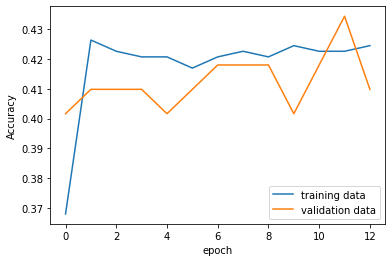

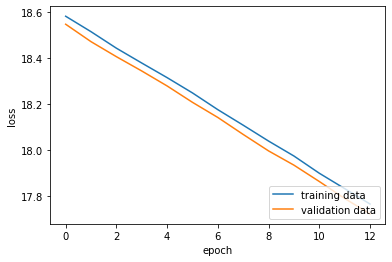

In [ ]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

# **L2 reguarization**

In [ ]:
model7 = 0

In [ ]:

model7 = Sequential()
model7.add( Conv2D( 42, ( 3,3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model7.add( MaxPool2D(3,3,) )
model7.add( Conv2D( 28, ( 3,3), activation = 'relu', kernel_regularizer = regularizers.l2(0.001) ) )
model7.add( Flatten() )
model7.add( Dense( 32, activation = 'relu', kernel_regularizer = regularizers.l2(0.001) ))
model7.add( Dense( 3, activation = 'softmax' ))

In [ ]:
model7.compile( optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
callback_a = ModelCheckpoint(filepath = 'model7.hdf5', monitor='val_accuracy', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_accuracy', mode='min', patience=12, verbose=1)
history7 = model7.fit(training_image_generator, validation_data = valid_image_generator, epochs = 64, batch_size = 32, callbacks = [callback_a,callback_b] )

Epoch 1/64
17/17 [==============================] - ETA: 0s - loss: 1.1912 - accuracy: 0.4057
Epoch 1: val_accuracy improved from -inf to 0.40984, saving model to model7.hdf5
17/17 [==============================] - 50s 3s/step - loss: 1.1912 - accuracy: 0.4057 - val_loss: 1.1799 - val_accuracy: 0.4098
Epoch 2/64
17/17 [==============================] - ETA: 0s - loss: 1.1891 - accuracy: 0.4226
Epoch 2: val_accuracy improved from 0.40984 to 0.41803, saving model to model7.hdf5
17/17 [==============================] - 49s 3s/step - loss: 1.1891 - accuracy: 0.4226 - val_loss: 1.1831 - val_accuracy: 0.4180
Epoch 3/64
17/17 [==============================] - ETA: 0s - loss: 1.1830 - accuracy: 0.4170
Epoch 3: val_accuracy improved from 0.41803 to 0.42623, saving model to model7.hdf5
17/17 [==============================] - 48s 3s/step - loss: 1.1830 - accuracy: 0.4170 - val_loss: 1.1799 - val_accuracy: 0.4262
Epoch 4/64
17/17 [==============================] - ETA: 0s - loss: 1.1871 - accur

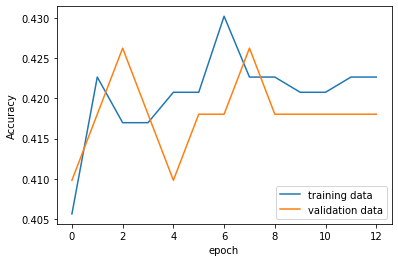

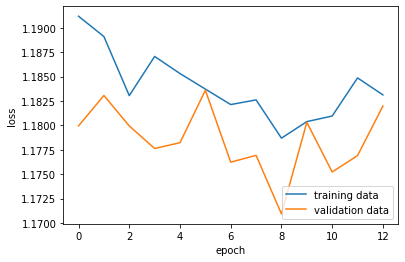

In [ ]:
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()